# Signate　Questの「民泊サービスにおける物件データを利用した宿泊価格予測モデルの作成」

## 必要ライブラリのインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 参考
Kaggleのタイタニック号の予測問題
https://www.kaggle.com/mhmdsyed/titanic-survival-prediction-with-ml

In [ ]:
import seaborn as sns 
import missingno as msno 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

import warnings

In [124]:
df_train = pd.read_csv("train.csv") #, index_col="Id")
df_train.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [125]:
warnings.filterwarnings('ignore')

In [126]:
print(df_train.columns.values)

['id' 'accommodates' 'amenities' 'bathrooms' 'bed_type' 'bedrooms' 'beds'
 'cancellation_policy' 'city' 'cleaning_fee' 'description' 'first_review'
 'host_has_profile_pic' 'host_identity_verified' 'host_response_rate'
 'host_since' 'instant_bookable' 'last_review' 'latitude' 'longitude'
 'name' 'neighbourhood' 'number_of_reviews' 'property_type'
 'review_scores_rating' 'room_type' 'thumbnail_url' 'zipcode' 'y']


In [127]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,Feel free to book INSTANTLY. You can check-in ...,2017-01-09,t,f,100%,2016-08-23,t,2017-09-25,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,The guest house is close to: Equinox West Holl...,2016-08-17,t,t,100%,2014-09-03,f,2017-05-02,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,Private room in a three bedroom apartment in N...,NaN,t,t,100%,2012-10-17,f,NaN,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,The apartment is located in historic Bed Stuy ...,NaN,t,t,NaN,2013-01-23,f,NaN,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,"Our cozy, pet friendly one bedroom apartment/l...",2015-08-01,t,t,100%,2014-12-28,f,2016-09-11,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

infoを見る限りnullはなさそう。
Countが55583でないものは、なんらかの欠損がある

In [129]:
Y_test = pd.read_csv("sample_submit.csv")
Y_test.head()

,0,10
0,1,10
1,2,10
2,3,10
3,4,10
4,5,10


2つ目の要素に、予想される値段(y)をいれればよさそう

In [130]:
df_train.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

## Data Understanding

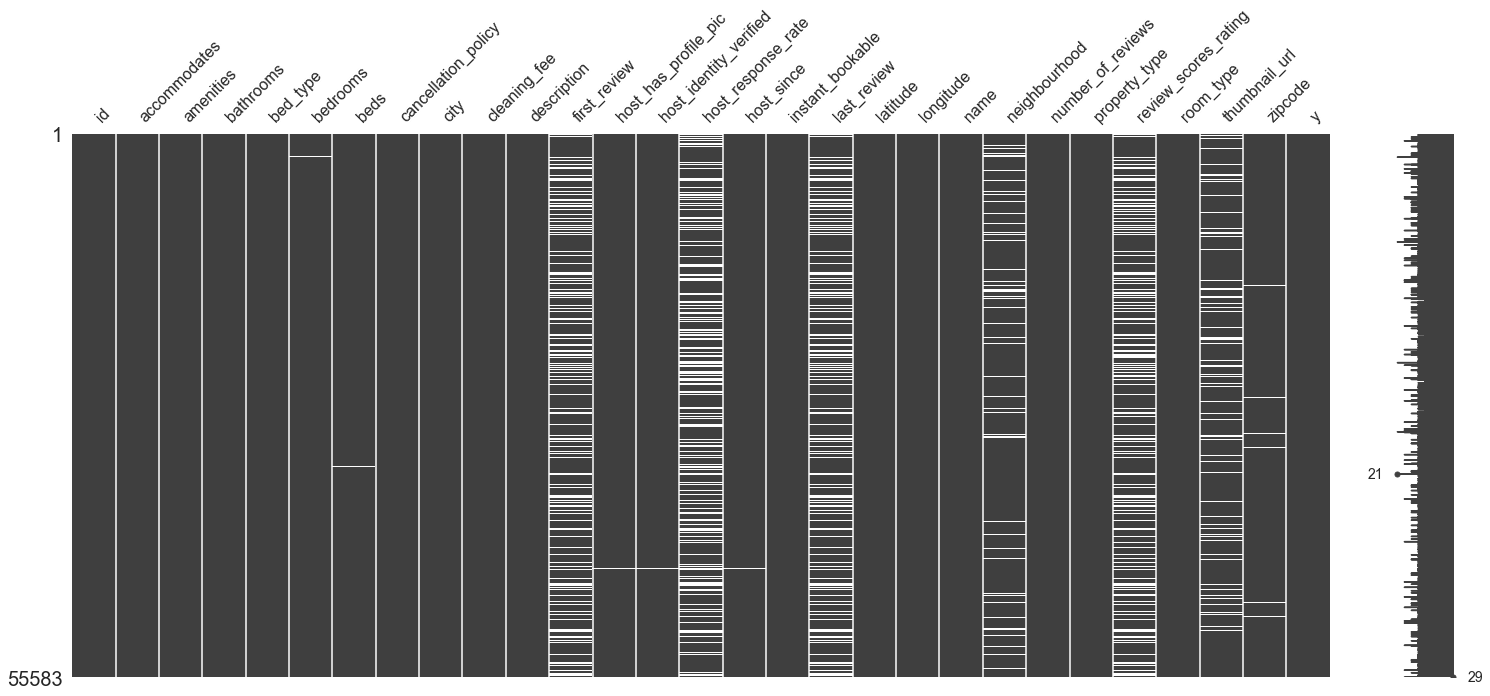

In [131]:
msno.matrix(df_train)
plt.show()

In [132]:
# https://www.kaggle.com/startupsci/titanic-data-science-solutions
df_train.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
count,55583.000000,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000
mean,27791.000000,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647
std,16045.574343,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,13895.500000,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000
50%,27791.000000,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000
75%,41686.500000,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000


In [133]:
df_train.describe(include=['O'])

,amenities,bed_type,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,property_type,room_type,thumbnail_url,zipcode
count,55583,55583,55583,55583,55583,55583,43675,55435,55435,41879,55435,55583,43703,55583,50423,55583,55583,49438,54867
unique,51031,5,5,6,2,55221,2446,2,2,78,3047,2,1298,55152,607,34,3,49431,737
top,{},Real Bed,strict,NYC,t,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,East Village Studio,Williamsburg,Apartment,Entire home/apt,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,435,53989,24318,24326,40821,8,214,55265,37264,32510,172,41034,1021,6,2189,36826,30939,3,1065


### 優先順位付けメモ

int
'id' float 以外は前処理が必要。

must 'accommodates' int
must 'amenities' text list
must 'bathrooms' float
must 'bed_type' text
must 'bedrooms' float
must 'beds' float
must 'cancellation_policy' text
must 'city' text
must 'cleaning_fee' bool

maybe 'description' - text
better 'first_review' - text
better 'host_has_profile_pic' bool

must 'host_identity_verified' bool
must 'host_response_rate' text

better 'host_since'

must 'instant_bookable' bool

better 'last_review' 

maybe 'latitude' float
maybe 'longitude' float

better 'name'
better 'neighbourhood'

maybe 'number_of_reviews' int
skip must 'property_type' text
maybe 'review_scores_rating' float
skip must 'room_type' text

maybe 'thumbnail_url' 
maybe 'zipcode'

## Data Cleaning & Encoding

In [134]:
df_train["bathrooms"] = df_train["bathrooms"].fillna(df_train["bathrooms"].median())
df_train["bedrooms"] = df_train["bedrooms"].fillna(df_train["bedrooms"].median())
df_train["beds"] = df_train["beds"].fillna(df_train["beds"].median())

df_train["host_has_profile_pic"] = df_train["host_has_profile_pic"].fillna("f")
df_train["host_identity_verified"] = df_train["host_identity_verified"].fillna("f")
df_train["host_response_rate"] = df_train["host_response_rate"].fillna('FILL')
#df_train['review_scores_rating'].fillna(df_train['review_scores_rating'].median())

df_test["bathrooms"] = df_test["bathrooms"].fillna(df_test["bathrooms"].median())
df_test["bedrooms"] = df_test["bedrooms"].fillna(df_test["bedrooms"].median())
df_test["beds"] = df_test["beds"].fillna(df_test["beds"].median())

df_test["host_has_profile_pic"] = df_test["host_has_profile_pic"].fillna("f")
df_test["host_identity_verified"] = df_test["host_identity_verified"].fillna("f")
df_test["host_response_rate"] = df_test["host_response_rate"].fillna('FILL')
#df_test['review_scores_rating'].fillna(df_test['review_scores_rating'].median())

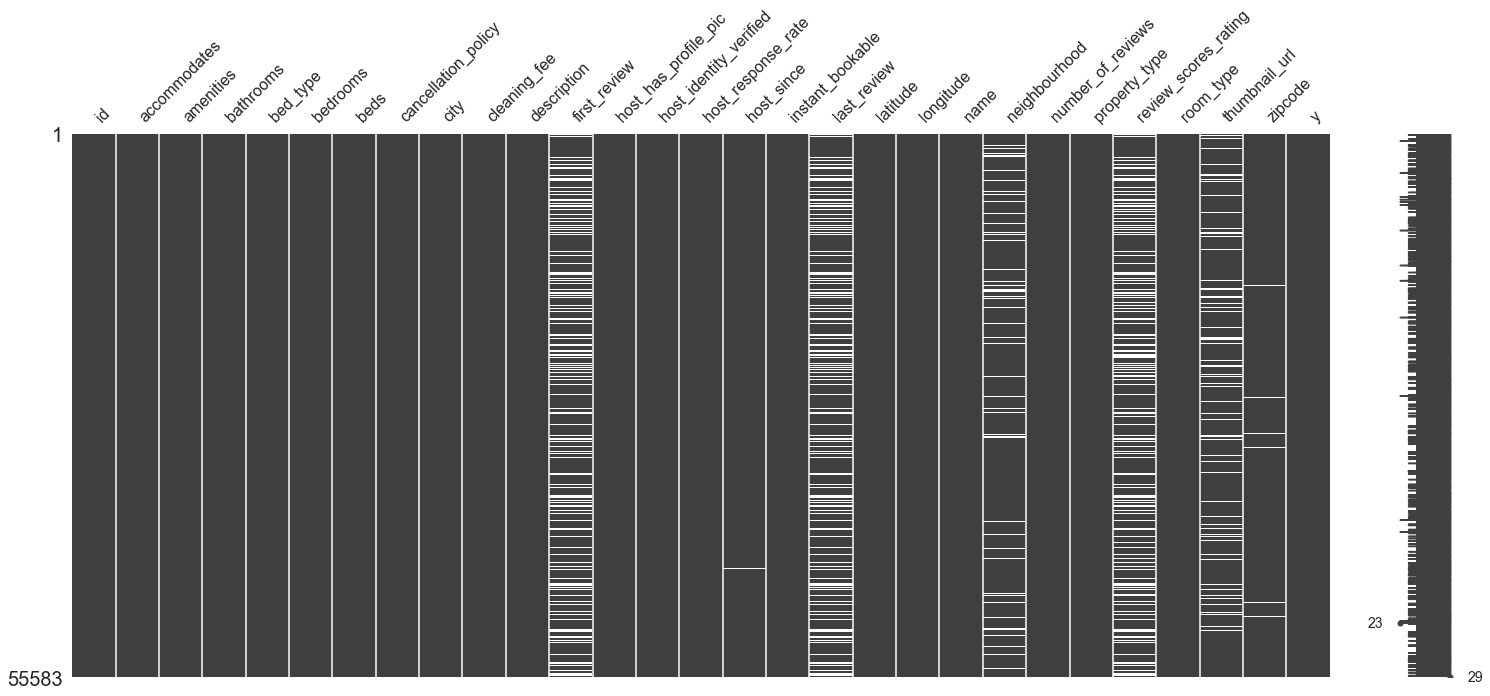

In [135]:
msno.matrix(df_train)
plt.show()

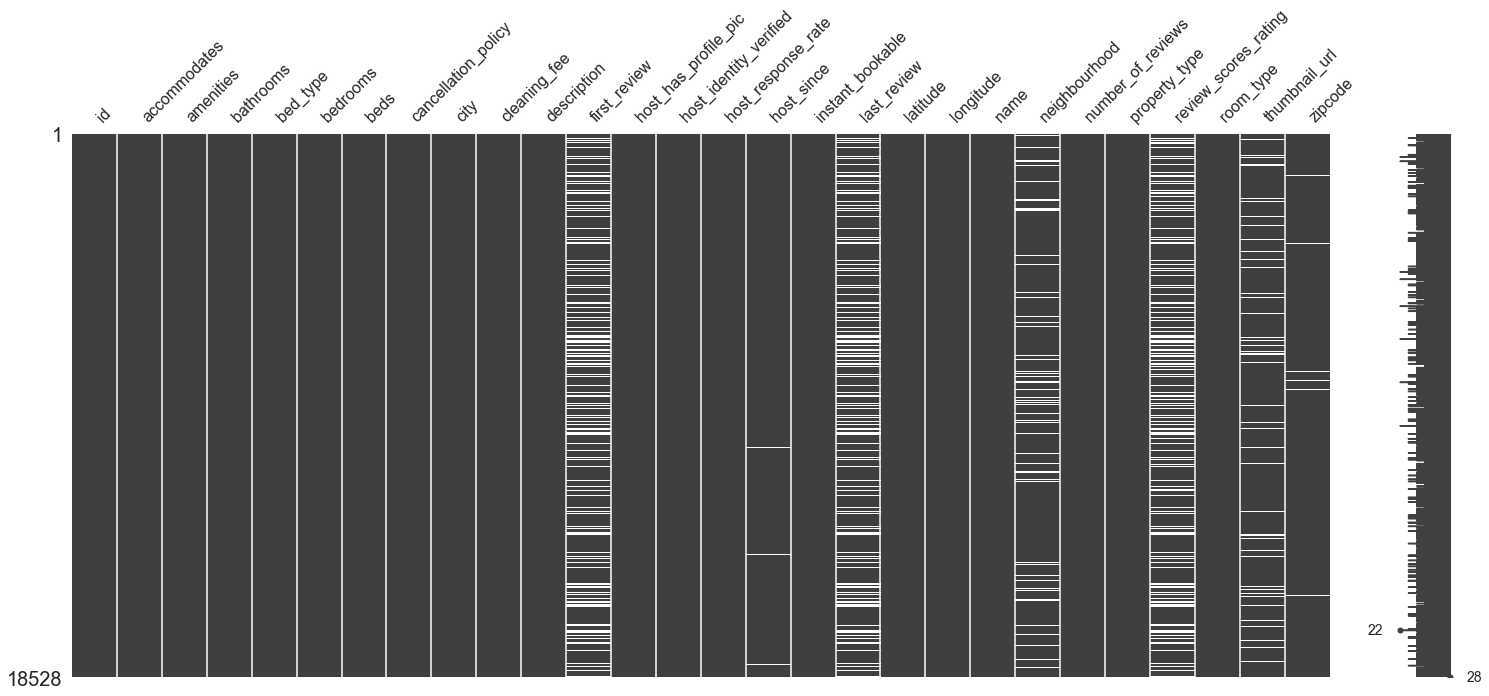

In [136]:
msno.matrix(df_test)
plt.show()

In [137]:
pd.set_option('display.max_columns', 100)
df_train.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,FILL,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


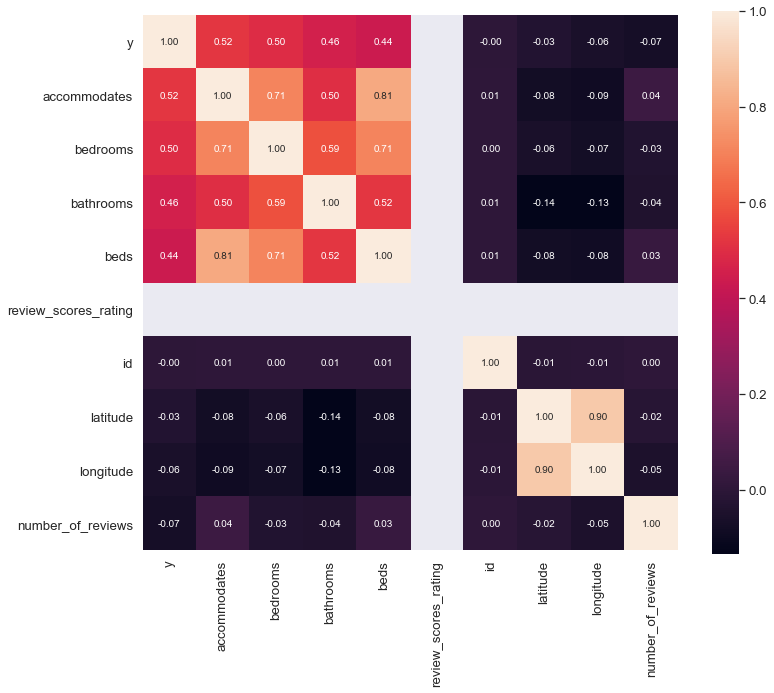

In [138]:
# https://nehori.com/nikki/2019/12/25/kaggle-2/#toc13
k = 20 # number of variables for heatmap
df = df_train
corrmat = df.corr()
cols = corrmat.nlargest(k, "y")["y"].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig("figure_feature_heatmap.png")

<AxesSubplot:>

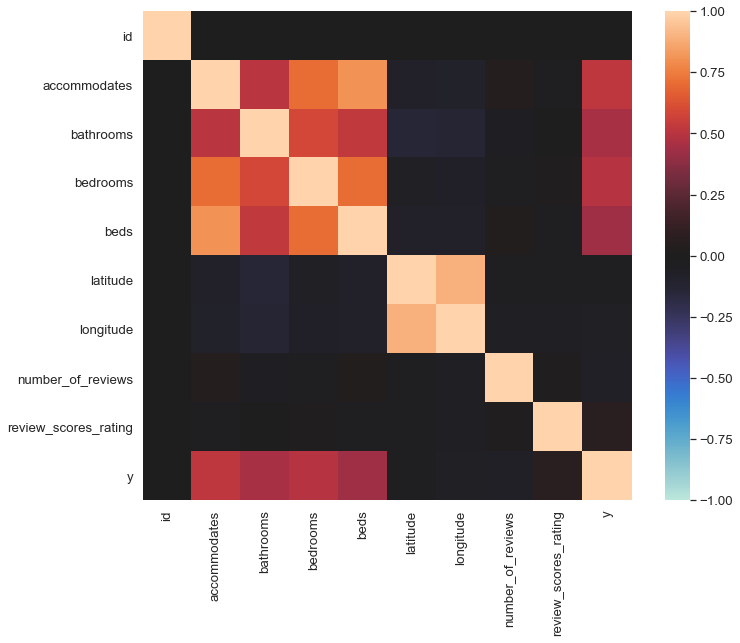

In [139]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_train.corr(), square=True, vmax=1, vmin=-1, center=0)

## 文字列リストのベクトル化

In [140]:
df_train['amenities'].unique()

array(['{TV,"Wireless Internet",Kitchen,"Free parking on premises",Washer,Dryer,"Smoke detector"}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Kitchen,"Free parking on premises",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self Check-In",Keypad,Lockbox,Bathtub,"Room-darkening shades"}',
       ...,
       '{TV,Internet,"Wir

In [141]:
#def amenities_to_category(df):
#df_train["TV"] = 
df_train.groupby("amenities").mean()

#sample = amenities_to_category(df_train)

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
amenities,,,,,,,,,,
"{""Air conditioning"",""Carbon monoxide detector"",""First aid kit"",""Lock on bedroom door"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",27415.000000,1.00000,1.000000,0.000000,1.00000,40.780807,-73.820051,0.000000,NaN,40.000000
"{""Air conditioning"",""Elevator in building"",Heating,""Smoke detector"",""Carbon monoxide detector"",Essentials}",11619.000000,2.00000,1.000000,0.000000,1.00000,38.932688,-77.038439,0.000000,NaN,100.000000
"{""Air conditioning"",""Fire extinguisher"",Essentials,Shampoo,Hangers}",12248.000000,4.00000,1.000000,0.000000,2.00000,33.988591,-118.439725,0.000000,NaN,300.000000
"{""Air conditioning"",""Free parking on premises"",""Indoor fireplace"",Heating,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",Hangers,Iron,""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",5578.000000,2.00000,1.000000,1.000000,1.00000,38.884417,-76.984919,0.000000,NaN,300.000000
"{""Air conditioning"",""Free parking on premises"",""Pets allowed"",Breakfast,""Pets live on this property"",Dog(s),Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials,Shampoo}",53278.000000,2.00000,1.000000,1.000000,1.00000,34.732700,-118.596728,46.000000,100.000000,60.000000
...,...,...,...,...,...,...,...,...,...,...
"{Washer,Dryer,Internet,""Smoke detector"",""Wireless Internet"",""Carbon monoxide detector"",""Fire extinguisher"",Kitchen,Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self Check-In"",Lockbox,Heating,""Family/kid friendly""}",26078.000000,4.00000,1.000000,1.000000,2.00000,42.348516,-71.083735,99.000000,88.000000,79.000000
"{Washer,Dryer,Internet,""Smoke detector"",""Wireless Internet"",""Carbon monoxide detector"",""First aid kit"",Kitchen,Essentials,""Free parking on premises"",Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",""Laptop friendly workspace"",Heating,""Family/kid friendly""}",50758.000000,2.00000,2.000000,1.000000,1.00000,42.357029,-71.158569,50.000000,96.000000,41.000000
"{Washer,Dryer,Internet,""Wireless Internet"",Kitchen,Essentials,Heating,""Family/kid friendly""}",49116.000000,2.00000,1.500000,1.000000,1.00000,37.771391,-122.447295,139.000000,87.000000,99.000000


In [142]:
df_train["amenities"].head()

0    {TV,"Wireless Internet",Kitchen,"Free parking ...
1    {TV,"Cable TV",Internet,"Wireless Internet","A...
2    {TV,Internet,"Wireless Internet",Kitchen,"Indo...
3    {TV,"Cable TV",Internet,"Wireless Internet","A...
4    {TV,Internet,"Wireless Internet","Air conditio...
Name: amenities, dtype: object

In [143]:
# https://qiita.com/ground0state/items/155b77f4c07e1a509a14
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(df_train["amenities"])
w2v_X_train = vectorizer.transform(df_train["amenities"])
#print(vectorizer.get_feature_names())
#print(X.toarray())

w2v_X_test = vectorizer.transform(df_test["amenities"])
type(w2v_X_test.toarray())

## 文字列の特徴の数値化

### bed_type

In [ ]:
df_train["bed_type"].unique()

array(['Real Bed', 'Pull-out Sofa', 'Airbed', 'Futon', 'Couch'],
      dtype=object)

In [ ]:
#replace 置換　https://note.nkmk.me/python-pandas-replace
df_train["bed_type"] = df_train["bed_type"].replace('Real Bed', 0).replace('Pull-out Sofa', 1).replace('Airbed', 2).replace('Futon', 3).replace('Couch', 4)
df_test["bed_type"] = df_test["bed_type"].replace('Real Bed', 0).replace('Pull-out Sofa', 1).replace('Airbed', 2).replace('Futon', 3).replace('Couch', 4)

### cancellation_policy

In [ ]:
df_train["cancellation_policy"].unique()

array(['flexible', 'strict', 'moderate', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [ ]:
df_train["cancellation_policy"] = df_train["cancellation_policy"].replace('flexible', 0).replace('strict', 1).replace('Airbed', 2).replace('moderate', 3).replace('super_strict_30', 4).replace('super_strict_60', 5)
df_test["cancellation_policy"] = df_test["cancellation_policy"].replace('flexible', 0).replace('strict', 1).replace('Airbed', 2).replace('moderate', 3).replace('super_strict_30', 4).replace('super_strict_60', 5)

### city

In [ ]:
df_train["city"].unique()

array(['LA', 'DC', 'NYC', 'SF', 'Chicago', 'Boston'], dtype=object)

In [ ]:
df_train["city"] = df_train["city"].replace('LA', 0).replace('DC', 1).replace('NYC', 2).replace('SF', 3).replace('Chicago', 4).replace('Boston', 5)
df_test["city"] = df_test["city"].replace('LA', 0).replace('DC', 1).replace('NYC', 2).replace('SF', 3).replace('Chicago', 4).replace('Boston', 5)

### cleaning_fee

In [ ]:
df_train["cleaning_fee"].unique()

array(['t', 'f'], dtype=object)

In [ ]:
df_train["cleaning_fee"] = df_train["cleaning_fee"].replace('t', 0).replace('f', 1)
df_test["cleaning_fee"] = df_test["cleaning_fee"].replace('t', 0).replace('f', 1)

### host_has_profile_pic

In [ ]:
df_train["host_has_profile_pic"] = df_train["host_has_profile_pic"].replace('t', 0).replace('f', 1)
df_test["host_has_profile_pic"] = df_test["host_has_profile_pic"].replace('t', 0).replace('f', 1)

### host_identity_verified

In [ ]:
df_train["host_identity_verified"] = df_train["host_identity_verified"].replace('t', 0).replace('f', 1)
df_test["host_identity_verified"] = df_test["host_identity_verified"].replace('t', 0).replace('f', 1)

### host_response_rate

In [ ]:
df_train["host_response_rate"].unique()

array(['FILL', '100%', '70%', '0%', '99%', '90%', '75%', '80%', '97%',
       '60%', '96%', '95%', '87%', '50%', '94%', '83%', '40%', '82%',
       '20%', '88%', '91%', '86%', '93%', '92%', '67%', '71%', '43%',
       '79%', '85%', '89%', '54%', '98%', '65%', '33%', '22%', '17%',
       '78%', '76%', '56%', '84%', '69%', '25%', '30%', '74%', '73%',
       '29%', '77%', '38%', '81%', '68%', '42%', '57%', '44%', '58%',
       '64%', '36%', '62%', '10%', '63%', '72%', '53%', '61%', '52%',
       '55%', '35%', '13%', '6%', '27%', '59%', '46%', '14%', '26%',
       '31%', '47%', '66%', '21%', '15%', '41%', '39%'], dtype=object)

In [ ]:
#print(df_train["host_response_rate"].replace('%', ))

0        FILL
1        100%
2        100%
3        100%
4        100%
         ... 
55578    100%
55579    FILL
55580    FILL
55581    100%
55582    100%
Name: host_response_rate, Length: 55583, dtype: object


### instant_bookable

In [ ]:
df_train["instant_bookable"].unique()

array(['f', 't'], dtype=object)

In [ ]:
df_train["instant_bookable"] = df_train["instant_bookable"].replace('t', 0).replace('f', 1)
df_test["instant_bookable"] = df_test["instant_bookable"].replace('t', 0).replace('f', 1)

In [ ]:
df_train.head()
df_test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,0,1.0,4.0,1,5,0,Feel free to book INSTANTLY. You can check-in ...,2017-01-09,0.0,1,FILL,2016-08-23,0,2017-09-25,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,0,1.0,1.0,3,0,0,The guest house is close to: Equinox West Holl...,2016-08-17,0.0,0,100%,2014-09-03,1,2017-05-02,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2.0,0,1.0,1.0,0,2,1,Private room in a three bedroom apartment in N...,NaN,0.0,1,100%,2012-10-17,1,NaN,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,0,1.0,1.0,1,2,1,The apartment is located in historic Bed Stuy ...,NaN,0.0,0,100%,2013-01-23,1,NaN,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,0,1.0,1.0,1,0,0,"Our cozy, pet friendly one bedroom apartment/l...",2015-08-01,0.0,0,100%,2014-12-28,1,2016-09-11,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [ ]:
df_train.isnull().sum()
df_test.isnull().sum()

id                           0
accommodates                 0
amenities                    0
bathrooms                    0
bed_type                     0
bedrooms                     0
beds                         0
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic         0
host_identity_verified       0
host_response_rate           0
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64

## 特徴選択

In [ ]:
y = df_train["y"]

#v1 扱いやすく効果がありそうな特徴を選定、相関行列でみると半分くらいはいらなそう
features = ['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds',
 'cancellation_policy', 'city', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', #'host_response_rate',
 'instant_bookable','number_of_reviews']



## 識別器の学習とテスト

In [ ]:
# https://nehori.com/nikki/2020/01/03/post-14508/
from sklearn.linear_model  import LinearRegression, ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import time

clf_names = ["LinearRegression",
             "ElasticNet", #
             "Lasso", #
             "Ridge",
             "LGBMRegressor", #popular
             "CatBoostRegressor",
             "XGBRegressor",
            ]
 
clf_params = ["",
              "max_iter=1000, tol=0.0001",
              "max_iter=1000, tol=0.0001",
              "",
              "boosting_type='gbdt', num_leaves=31, learning_rate=0.1, n_estimators=100",
              "logging_level='Silent'",
              "max_depth=3, learning_rate=0.1, n_estimators=100",
             ]
 
def sklearn_model(x_train, y_train):    
       start = time.time()
       models = list()
       model = None # もっと精度が高いモデル
       total = 0.0
       name  = ""
       for i in range(len(clf_names)):
              clf    = eval("%s(%s)" % (clf_names[i], clf_params[i]))
              clf.fit(x_train, y_train)
              score = clf.score(x_train, y_train)
              print('%s Accuracy:' % clf_names[i], score)
              models.append(clf)
              if total <= score:
                     total = score
                     model = clf
                     name  = clf_names[i]
       print(str(time.time() - start))
       print('%s was selected' % name)
       return models, model

In [ ]:
type(df_train[features])

pandas.core.frame.DataFrame

In [ ]:
#concat https://note.nkmk.me/python-pandas-concat/
#学習データを目的変数とそれ以外に分ける
X_train = df_train[features]
X_test  = df_test[features]
#X_train = pd.concat([df_train[features], pd.DataFrame(w2v_X_train.toarray())])
#X_test  = pd.concat([df_test[features], pd.DataFrame(w2v_X_test.toarray())])
y_train = df_train["y"]
# 学習データとテストデータを統合
#models, model = sklearn_model(X_train, y_train)

In [ ]:
w2v_X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [ ]:
df_train[features].describe()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews
count,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000,55583.000000
mean,3.152906,1.235801,0.066927,1.264973,1.710541,1.215462,1.644712,0.265585,0.005721,0.329579,0.738247,20.937283
std,2.153001,0.582429,0.426469,0.848830,1.257083,1.141051,1.367265,0.441648,0.075422,0.470065,0.439593,37.951889
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,4.000000,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,23.000000
max,16.000000,8.000000,4.000000,10.000000,18.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,605.000000


In [ ]:
X_test.describe()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews
count,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000
mean,3.161863,1.232540,0.062068,1.261280,1.700669,1.216375,1.645402,0.266947,0.005181,0.325453,0.735427,20.790425
std,2.155397,0.573631,0.410936,0.852042,1.236399,1.144344,1.369940,0.442377,0.071797,0.468557,0.441117,37.457273
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,4.000000,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,23.000000
max,16.000000,8.000000,4.000000,10.000000,18.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,451.000000


In [ ]:
models, model = sklearn_model(X_train, y_train)

LinearRegression Accuracy: 0.34762589006283984
ElasticNet Accuracy: 0.32350883564885624
Lasso Accuracy: 0.3464664971551382
Ridge Accuracy: 0.34762588909081404
LGBMRegressor Accuracy: 0.5544177817665816
CatBoostRegressor Accuracy: 0.5927444419799217
XGBRegressor Accuracy: 0.48142715216096477
42.03569006919861
CatBoostRegressor was selected


In [ ]:
X_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews
0,6,2.0,0,1.0,4.0,1,5,0,0.0,1,0,58
1,3,1.0,0,1.0,1.0,3,0,0,0.0,0,1,4
2,2,2.0,0,1.0,1.0,0,2,1,0.0,1,1,0
3,4,1.0,0,1.0,1.0,1,2,1,0.0,0,1,0
4,3,1.0,0,1.0,1.0,1,0,0,0.0,0,1,6


In [121]:
score = model.score(X_train, y_train)
print('Accuracy:' % "logging_level='Silent'", score)

predictions = model.predict(X_test)
output = pd.DataFrame({'id': X_test[1], 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

NameError: name 'x_train' is not defined